## Chapter 10
# Time Series
---
## 시계열 그래프

In [5]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [6]:
stock = pd.read_csv('stock_px.csv', index_col=0, parse_dates=[0]) # 2214 rows, 1/2/2003 ~ 10/14/2011

In [7]:
stock.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [8]:
close_px = stock.resample('B').asfreq() # 2292 rows (2214 non-null)
close_px[close_px.isnull().any(axis=1)].index # 78 rows

DatetimeIndex(['2003-01-20', '2003-02-17', '2003-04-18', '2003-05-26',
               '2003-07-04', '2003-09-01', '2003-11-27', '2003-12-25',
               '2004-01-01', '2004-01-19', '2004-02-16', '2004-04-09',
               '2004-05-31', '2004-06-11', '2004-07-05', '2004-09-06',
               '2004-11-25', '2004-12-24', '2005-01-17', '2005-02-21',
               '2005-03-25', '2005-05-30', '2005-07-04', '2005-09-05',
               '2005-11-24', '2005-12-26', '2006-01-02', '2006-01-16',
               '2006-02-20', '2006-04-14', '2006-05-29', '2006-07-04',
               '2006-09-04', '2006-11-23', '2006-12-25', '2007-01-01',
               '2007-01-02', '2007-01-15', '2007-02-19', '2007-04-06',
               '2007-05-28', '2007-07-04', '2007-09-03', '2007-11-22',
               '2007-12-25', '2008-01-01', '2008-01-21', '2008-02-18',
               '2008-03-21', '2008-05-26', '2008-07-04', '2008-09-01',
               '2008-11-27', '2008-12-25', '2009-01-01', '2009-01-19',
      

In [9]:
close_px = stock.resample('B').pad() # 2292 rows
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 4 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
SPX     2292 non-null float64
dtypes: float64(4)
memory usage: 89.5 KB


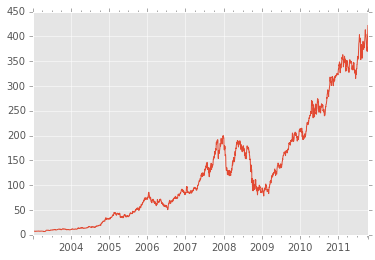

In [10]:
close_px['AAPL'].plot()

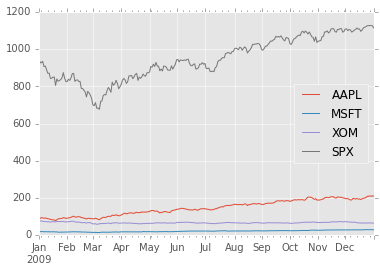

In [11]:
close_px.loc['2009'].plot()

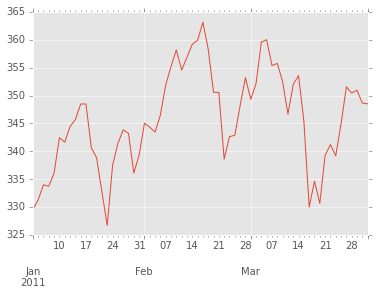

In [12]:
close_px['AAPL']['2011-01':'2011-03'].plot()

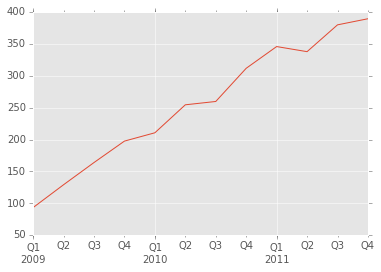

In [13]:
apple_q = close_px['AAPL'].resample('Q-DEC').mean()
apple_q['2009':].plot()

In [14]:
# pd.rolling_mean(close_px.AAPL,3).head()
close_px.rolling(3).mean().head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,7.433333,21.256667,29.473333,915.543333
2003-01-07,7.443333,21.530000,29.383333,920.176667
2003-01-08,7.386667,21.586667,29.246667,920.623333


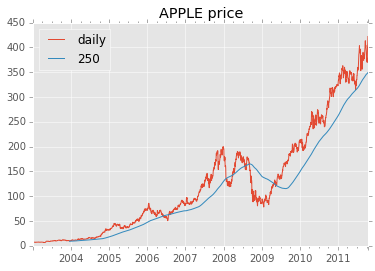

In [15]:
plt.title('APPLE price')
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
plt.legend(['daily','250'],loc='upper left')

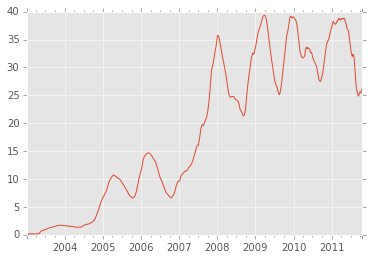

In [16]:
apple_std = close_px.AAPL.rolling(250, 10).std() # min_periods=10
apple_std.plot()

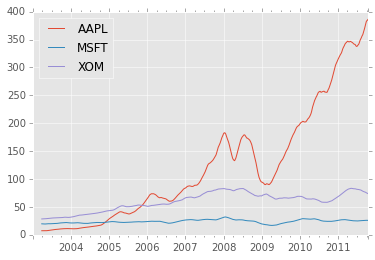

In [17]:
close_px[['AAPL','MSFT','XOM']].rolling(60).mean().plot()

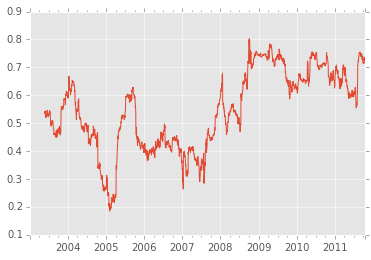

In [18]:
returns = close_px.pct_change()
spx_px = close_px.SPX / close_px.SPX.shift(1) -1
returns.AAPL.rolling(125,100).corr(spx_px).plot()

In [22]:
returns.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086


In [25]:
close_px.SPX.pct_change().head()

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Freq: B, Name: SPX, dtype: float64

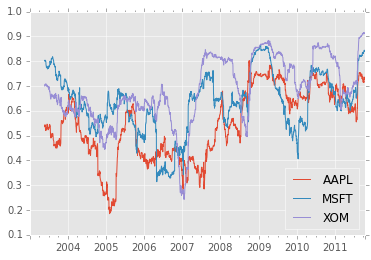

In [19]:
returns.iloc[:,:-1].rolling(125,100).corr(spx_px).plot()

In [20]:
close_px.rolling(3).apply(lambda arr: arr[-1]/arr[0]).head() # 1-D numpy array

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN
2003-01-06,1.006757,1.019422,1.025325,1.021979
2003-01-07,0.997315,1.037370,0.990082,1.015783
2003-01-08,0.977181,0.990242,0.962283,0.979462
